# Prerequirments

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision.transforms import functional as F
from matplotlib.animation import FuncAnimation
from functools import partial
from IPython.display import HTML

In [2]:
def show_data(X, y, b, bhat=None):
    if bhat != None:
        if bhat.grad != None:
            fig, axs = plt.subplots(1, 5, figsize=(2 * 5, 6))
        else:
            fig, axs = plt.subplots(1, 4, figsize=(2 * 4, 6))
    else:
        fig, axs = plt.subplots(1, 3, figsize=(2 * 3, 6))

    # Plot X
    axs[0].imshow(F.to_pil_image(X), cmap='hot')
    axs[0].set_title('X')
    axs[0].axis('off')

    # Plot b
    b_show = torch.ones(X.shape)
    b_show[:b.shape[0], int(X.shape[1] / 2)] = b.reshape(-1)
    axs[1].imshow(F.to_pil_image(b_show), cmap='hot', aspect=1)
    axs[1].set_title('b')
    axs[1].axis('off')

    if bhat != None:
        # plot bhat
        bhat_show = torch.ones(X.shape)
        bhat_show[:bhat.shape[0], int(X.shape[1] / 2)] = bhat.reshape(-1)
        axs[2].imshow(F.to_pil_image(bhat_show), cmap='hot', aspect=1)
        axs[2].set_title('bhat')
        axs[2].axis('off')

        if bhat.grad != None:
            # plot bhat.grad
            bhatg_show = torch.ones(X.shape)
            bhatg_show[:bhat.grad.shape[0], int(X.shape[1] / 2)] = bhat.grad.reshape(-1)
            axs[3].imshow(F.to_pil_image(bhatg_show), cmap='hot', aspect=1)
            axs[3].set_title('bhat.grad')
            axs[3].axis('off')

    # Plot y
    y_show = torch.ones(X.shape)
    y_show[:y.shape[0], int(X.shape[1] / 2)] = y.reshape(-1)
    axs[-1].imshow(F.to_pil_image(y_show), cmap='hot')
    axs[-1].set_title('y')
    axs[-1].axis('off')

    return fig, axs

In [3]:
def show_params(b, bhat):
    fig, axs = plt.subplots(1, 3, figsize=(3, 3))

    # Plot b
    axs[0].clear()
    axs[0].imshow(F.to_pil_image(b), cmap='hot')
    axs[0].set_title('b')
    axs[0].axis('off')

    # Plot bhat
    axs[1].clear()
    axs[1].imshow(F.to_pil_image(bhat.clone().detach()), cmap='hot')
    axs[1].set_title('bhat')
    axs[1].axis('off')

    # Plot bhat.grad
    axs[2].clear()
    axs[2].imshow(F.to_pil_image(bhat.grad), cmap='hot')
    axs[2].set_title('bhat.grad')
    axs[2].axis('off')

    return fig, axs

In [4]:
def update(i, fig, axs, bhats, bhat_grads):

    # Plot bhat
    axs[1].clear()
    axs[1].imshow(F.to_pil_image(bhats[i]), cmap='hot')
    axs[1].set_title('bhat')
    axs[1].axis('off')

    # Plot bhat.grad
    axs[2].clear()
    axs[2].imshow(F.to_pil_image(bhat_grads[i]), cmap='hot')
    axs[2].set_title('bhat.grad')
    axs[2].axis('off')

def animate(b, bhats, bhat_grads):
    fig, axs = plt.subplots(1, 3, figsize=(3, 3))

    # Plot b
    axs[0].clear()
    axs[0].imshow(F.to_pil_image(b), cmap='hot')
    axs[0].set_title('b')
    axs[0].axis('off')

    anim = partial(update, fig=fig, axs=axs, bhats=bhats, bhat_grads=bhat_grads)
    ani = FuncAnimation(fig, anim, frames=len(bhats), interval=100, repeat=False)
    return ani.to_html5_video()

# Difine Matrices

In [5]:
n = 20
p = 5
X = torch.rand(n, p) * 10
b = torch.rand(p, 1) * 10
y = X @ b

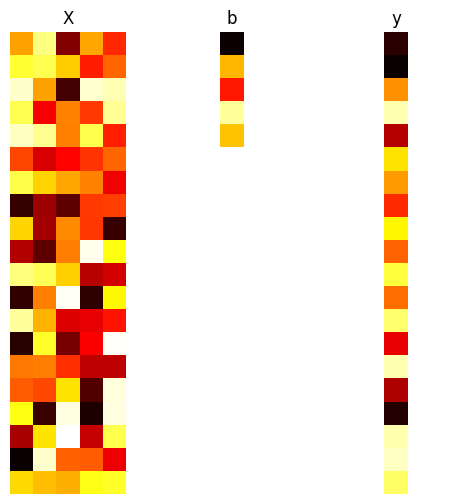

In [6]:
fig, axs = show_data(X, y, b)

fig.show()

In [7]:
b

tensor([[8.3314],
        [8.7774],
        [3.5937],
        [8.9635],
        [2.7691]])

# Basic Linear Regression

In [10]:
bhat = torch.rand(p, 1, requires_grad=True)
bhat

tensor([[0.9453],
        [0.7528],
        [0.3755],
        [0.8740],
        [0.9113]], requires_grad=True)

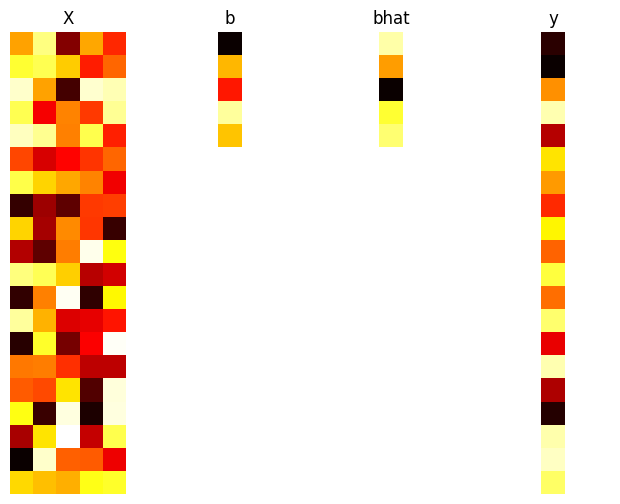

In [11]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

In [12]:
print(f'Requred grad of bhat is {bhat.requires_grad}')
print(f'But Requred grad of b is {b.requires_grad}')

Requred grad of bhat is True
But Requred grad of b is False


## Calculate Loss

In [13]:
bhat.grad

In [14]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss

tensor([[471723.0625]], grad_fn=<MmBackward0>)

In [15]:
loss.backward()

In [16]:
bhat.grad

tensor([[-36944.5078],
        [-36678.0938],
        [-32661.6152],
        [-27818.6758],
        [-24811.4492]])

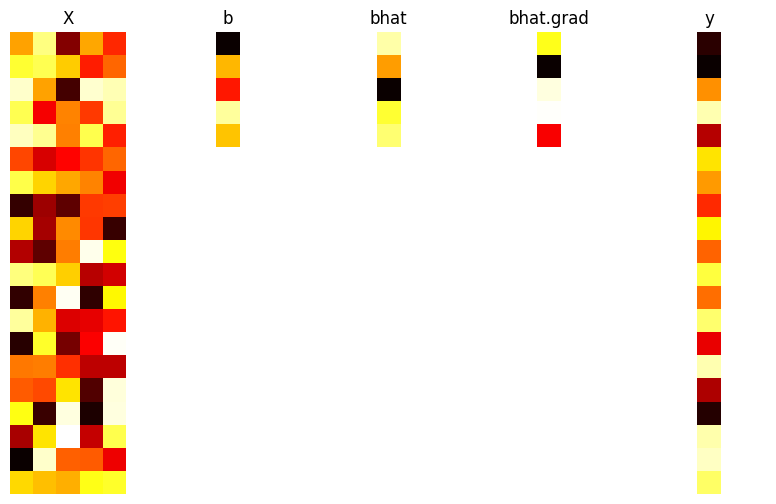

In [17]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

## Manually Update Bhat

In [18]:
bhat

tensor([[0.9453],
        [0.7528],
        [0.3755],
        [0.8740],
        [0.9113]], requires_grad=True)

In [19]:
bhat = (bhat - 0.001 * bhat.grad)
bhat = bhat.detach()

In [20]:
bhat.grad

In [22]:
bhat = bhat.requires_grad_(True)

In [23]:
bhat

tensor([[37.8898],
        [37.4309],
        [33.0371],
        [28.6926],
        [25.7227]], requires_grad=True)

### Iteratively

In [24]:
epoch = 200
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()
    bhat = (bhat - 0.0001 * bhat.grad).detach().requires_grad_(True)

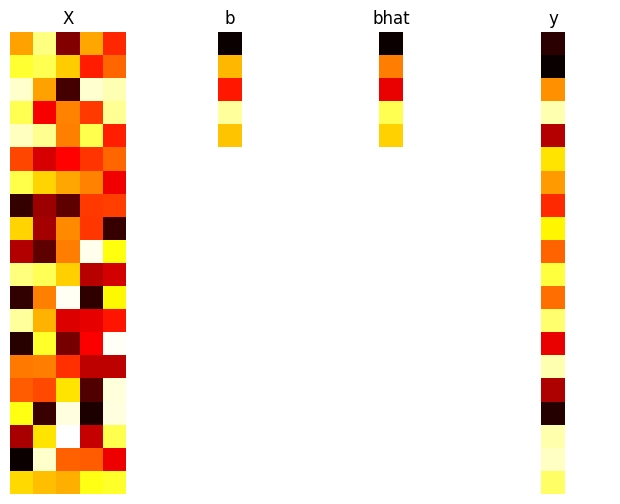

In [25]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

### Iteratively with Detail

In [26]:
bhat = torch.rand(p, 1, requires_grad=True)

In [27]:
bhats = []
bhat_grads = []

epoch = 200
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()

    bhats.append(bhat.clone().float().detach())
    bhat_grads.append(bhat.grad.clone().detach())

    bhat = (bhat - 0.0001 * bhat.grad).clone().detach().requires_grad_(True)

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

3.8646 4.7264 4.2630 3.4199 3.0335 
5.6235 6.4203 5.6616 4.7618 4.1098 
6.4628 7.1928 6.2017 5.4210 4.5344 
6.8892 7.5539 6.3633 5.7734 4.6710 
7.1289 7.7310 6.3599 5.9866 4.6817 
7.2827 7.8253 6.2866 6.1355 4.6387 
7.3956 7.8821 6.1855 6.2536 4.5739 
7.4879 7.9216 6.0754 6.3557 4.5016 
7.5687 7.9528 5.9643 6.4488 4.4279 
7.6422 7.9797 5.8557 6.5359 4.3555 
7.7104 8.0041 5.7510 6.6185 4.2855 
7.7742 8.0270 5.6508 6.6973 4.2184 
7.8342 8.0487 5.5551 6.7728 4.1542 
7.8907 8.0694 5.4638 6.8452 4.0928 
7.9439 8.0892 5.3768 6.9146 4.0343 
7.9941 8.1083 5.2939 6.9813 3.9784 
8.0414 8.1265 5.2150 7.0453 3.9251 
8.0860 8.1441 5.1398 7.1068 3.8743 
8.1280 8.1609 5.0682 7.1658 3.8258 
8.1675 8.1772 4.9999 7.2226 3.7796 
8.2046 8.1928 4.9349 7.2772 3.7354 
8.2395 8.2078 4.8730 7.3296 3.6933 
8.2724 8.2223 4.8141 7.3800 3.6531 
8.3032 8.2362 4.7579 7.4285 3.6148 
8.3321 8.2496 4.7043 7.4752 3.5782 
8.3592 8.2626 4.6534 7.5201 3.5433 
8.3846 8.2751 4.6048 7.5633 3.5100 
8.4084 8.2871 4.5585 7.6048 

In [28]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

8.3314 8.7774 3.5937 8.9635 2.7691 

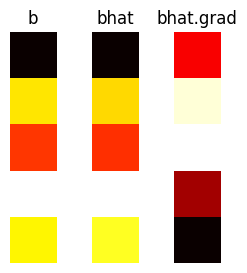

In [29]:
html_video = animate(b, bhats, bhat_grads)
HTML(html_video)

## Update Bhat Using Adam

In [30]:
from torch.optim import Adam

In [31]:
bhat = torch.rand(p, 1, requires_grad=True)

In [32]:
optimizer = Adam(params=[bhat], lr=0.1)

In [33]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss.backward()

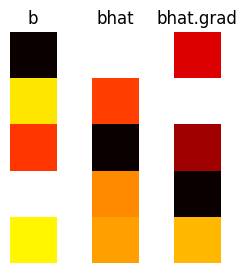

In [34]:
fig, axs = show_params(b, bhat)

fig.show()

In [35]:
optimizer.step()

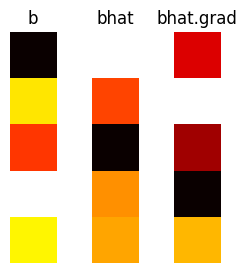

In [36]:
fig, axs = show_params(b, bhat)

fig.show()

### Zero Grad

In [37]:
bhat.grad

tensor([[-39383.4805],
        [-39137.9102],
        [-34955.2656],
        [-29664.8027],
        [-26594.2363]])

In [42]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss.backward()

In [45]:
bhat.grad

In [44]:
optimizer.zero_grad()

In [ ]:
bhat.grad

### Iteratively

In [46]:
epoch = 1000
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.7932 0.5317 0.3065 0.5870 0.6034 
0.8930 0.6316 0.4064 0.6869 0.7033 
0.9928 0.7314 0.5061 0.7867 0.8031 
1.0925 0.8310 0.6058 0.8863 0.9027 
1.1919 0.9305 0.7052 0.9858 1.0021 
1.2912 1.0297 0.8044 1.0851 1.1013 
1.3902 1.1288 0.9034 1.1841 1.2003 
1.4890 1.2275 1.0020 1.2829 1.2989 
1.5875 1.3260 1.1004 1.3814 1.3973 
1.6856 1.4241 1.1984 1.4796 1.4953 
1.7834 1.5219 1.2959 1.5774 1.5929 
1.8808 1.6192 1.3931 1.6748 1.6900 
1.9778 1.7162 1.4898 1.7717 1.7867 
2.0743 1.8126 1.5860 1.8683 1.8829 
2.1703 1.9086 1.6816 1.9643 1.9785 
2.2658 2.0040 1.7767 2.0598 2.0736 
2.3607 2.0989 1.8711 2.1548 2.1680 
2.4551 2.1932 1.9650 2.2491 2.2618 
2.5488 2.2868 2.0581 2.3429 2.3549 
2.6419 2.3798 2.1505 2.4360 2.4473 
2.7343 2.4721 2.2422 2.5284 2.5390 
2.8260 2.5637 2.3331 2.6202 2.6299 
2.9170 2.6546 2.4231 2.7112 2.7199 
3.0072 2.7447 2.5124 2.8014 2.8091 
3.0966 2.8340 2.6007 2.8909 2.8975 
3.1852 2.9224 2.6882 2.9796 2.9849 
3.2730 3.0101 2.7747 3.0674 3.0714 
3.3599 3.0968 2.8602 3.1544 

In [47]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

8.3314 8.7774 3.5937 8.9635 2.7691 

## Pytorch Loss Functions

In [48]:
bhat = torch.rand(p, 1, requires_grad=True)

In [49]:
optimizer = Adam(params=[bhat], lr=0.1)

In [50]:
loss = (X @ bhat - y).T @ (X @ bhat - y) * (1 / X.shape[0])

loss

tensor([[26761.9570]], grad_fn=<MulBackward0>)

In [51]:
loss_fn = torch.nn.MSELoss()

loss = loss_fn(X @ bhat, y)

loss

tensor(26761.9570, grad_fn=<MseLossBackward0>)

In [52]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(X @ bhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.1868 1.0369 0.1719 0.1301 0.8893 
0.2868 1.1368 0.2719 0.2301 0.9893 
0.3866 1.2367 0.3718 0.3300 1.0892 
0.4864 1.3365 0.4715 0.4297 1.1889 
0.5861 1.4361 0.5711 0.5294 1.2885 
0.6855 1.5356 0.6705 0.6289 1.3880 
0.7848 1.6349 0.7698 0.7281 1.4872 
0.8838 1.7339 0.8687 0.8272 1.5861 
0.9826 1.8326 0.9674 0.9260 1.6848 
1.0811 1.9311 1.0657 1.0245 1.7831 
1.1793 2.0292 1.1637 1.1226 1.8811 
1.2771 2.1269 1.2613 1.2204 1.9786 
1.3745 2.2243 1.3584 1.3179 2.0757 
1.4714 2.3212 1.4551 1.4149 2.1724 
1.5679 2.4176 1.5513 1.5114 2.2685 
1.6640 2.5135 1.6469 1.6074 2.3641 
1.7594 2.6089 1.7419 1.7030 2.4591 
1.8544 2.7037 1.8364 1.7980 2.5535 
1.9487 2.7979 1.9301 1.8924 2.6473 
2.0425 2.8915 2.0232 1.9861 2.7403 
2.1356 2.9844 2.1156 2.0793 2.8326 
2.2280 3.0767 2.2073 2.1718 2.9242 
2.3197 3.1682 2.2981 2.2636 3.0149 
2.4107 3.2589 2.3881 2.3546 3.1049 
2.5009 3.3489 2.4773 2.4449 3.1940 
2.5904 3.4381 2.5656 2.5345 3.2822 
2.6790 3.5264 2.6530 2.6232 3.3695 
2.7668 3.6139 2.7394 2.7111 

In [53]:
b

tensor([[8.3314],
        [8.7774],
        [3.5937],
        [8.9635],
        [2.7691]])

# Pytorch Linear Regression

2 (1).svg

In [54]:
h = torch.nn.Linear(p, 1)

In [55]:
h(X)

tensor([[ 0.1198],
        [-3.5835],
        [-1.6830],
        [-2.7641],
        [-1.1683],
        [-3.5509],
        [-4.0410],
        [-2.7785],
        [-2.5231],
        [-3.0817],
        [-2.3943],
        [-2.2282],
        [-2.4926],
        [-3.6447],
        [-3.6930],
        [-1.5741],
        [-3.8711],
        [-2.9095],
        [-0.6056],
        [-2.9128]], grad_fn=<AddmmBackward0>)

In [56]:
print(h.weight)
print(h.bias)

Parameter containing:
tensor([[-0.1415, -0.1512,  0.3009, -0.2686, -0.3193]], requires_grad=True)
Parameter containing:
tensor([0.0816], requires_grad=True)


In [57]:
h.parameters()

<generator object Module.parameters at 0x783c1ea02570>

In [58]:
type(h.parameters())

generator

In [59]:
for o in h.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[-0.1415, -0.1512,  0.3009, -0.2686, -0.3193]], requires_grad=True)
--------
Parameter containing:
tensor([0.0816], requires_grad=True)


In [60]:
optimizer = Adam(params=h.parameters(), lr=0.1)

loss_fn = torch.nn.MSELoss()

In [61]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(h(X), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in h.weight.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

-0.0415 -0.0512 0.4009 -0.1686 -0.2193 
0.0585 0.0487 0.5009 -0.0687 -0.1193 
0.1583 0.1486 0.6008 0.0312 -0.0195 
0.2581 0.2484 0.7005 0.1310 0.0803 
0.3578 0.3480 0.8001 0.2307 0.1799 
0.4573 0.4475 0.8996 0.3302 0.2794 
0.5566 0.5468 0.9988 0.4295 0.3786 
0.6557 0.6459 1.0978 0.5285 0.4776 
0.7545 0.7447 1.1966 0.6274 0.5763 
0.8530 0.8432 1.2950 0.7259 0.6748 
0.9513 0.9414 1.3930 0.8242 0.7728 
1.0491 1.0393 1.4907 0.9220 0.8705 
1.1466 1.1367 1.5880 1.0196 0.9678 
1.2437 1.2338 1.6848 1.1167 1.0646 
1.3404 1.3304 1.7812 1.2133 1.1609 
1.4365 1.4265 1.8770 1.3095 1.2568 
1.5322 1.5221 1.9723 1.4052 1.3520 
1.6274 1.6172 2.0670 1.5004 1.4467 
1.7220 1.7117 2.1610 1.5950 1.5408 
1.8160 1.8056 2.2544 1.6890 1.6342 
1.9093 1.8989 2.3472 1.7824 1.7269 
2.0021 1.9916 2.4392 1.8752 1.8189 
2.0941 2.0835 2.5305 1.9673 1.9102 
2.1855 2.1747 2.6210 2.0587 2.0007 
2.2761 2.2652 2.7107 2.1494 2.0904 
2.3660 2.3550 2.7996 2.2393 2.1793 
2.4551 2.4439 2.8876 2.3285 2.2673 
2.5435 2.5321 2.9747 

In [62]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

8.3314 8.7774 3.5937 8.9635 2.7691 

# My Linear Regression

In [63]:
from torch.nn.parameter import Parameter

In [65]:
class MyLinearRegression(torch.nn.Module):

    def __init__(self, p):
        super().__init__()
        self.weight = Parameter(torch.rand(p, 1))
        self.bias = Parameter(torch.tensor([0.0]))

    def forward(self, x):
        return x @ self.weight + self.bias

In [66]:
my_h = MyLinearRegression(p)

In [67]:
my_h(X)

tensor([[12.2169],
        [14.9766],
        [18.5583],
        [ 8.7592],
        [15.2080],
        [14.5840],
        [18.8422],
        [12.6474],
        [ 9.6825],
        [22.9365],
        [21.9156],
        [22.6869],
        [ 8.9653],
        [ 9.8972],
        [24.5193],
        [ 4.5297],
        [11.1943],
        [12.0904],
        [14.7181],
        [ 7.6080]], grad_fn=<AddBackward0>)

In [68]:
print(my_h.weight)
print(my_h.bias)

Parameter containing:
tensor([[0.3196],
        [0.4987],
        [0.8177],
        [0.9620],
        [0.3832]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [69]:
my_h.parameters()

<generator object Module.parameters at 0x783c1ebcdcb0>

In [70]:
type(my_h.parameters())

generator

In [71]:
for o in my_h.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[0.3196],
        [0.4987],
        [0.8177],
        [0.9620],
        [0.3832]], requires_grad=True)
--------
Parameter containing:
tensor([0.], requires_grad=True)


In [72]:
optimizer = Adam(params=my_h.parameters(), lr=0.1)

loss_fn = torch.nn.MSELoss()

In [73]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(my_h(X), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in my_h.weight.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.4196 0.5987 0.9177 1.0620 0.4832 
0.5195 0.6987 1.0176 1.1619 0.5832 
0.6194 0.7986 1.1175 1.2618 0.6830 
0.7191 0.8983 1.2172 1.3616 0.7828 
0.8188 0.9979 1.3168 1.4612 0.8824 
0.9182 1.0974 1.4162 1.5606 0.9817 
1.0174 1.1966 1.5153 1.6598 1.0809 
1.1164 1.2955 1.6142 1.7588 1.1797 
1.2151 1.3942 1.7127 1.8575 1.2783 
1.3134 1.4925 1.8109 1.9558 1.3765 
1.4114 1.5905 1.9087 2.0538 1.4743 
1.5090 1.6880 2.0061 2.1514 1.5716 
1.6062 1.7852 2.1029 2.2486 1.6685 
1.7029 1.8818 2.1993 2.3453 1.7649 
1.7991 1.9780 2.2951 2.4415 1.8607 
1.8948 2.0736 2.3903 2.5372 1.9559 
1.9899 2.1686 2.4849 2.6322 2.0505 
2.0844 2.2631 2.5788 2.7267 2.1444 
2.1782 2.3568 2.6720 2.8206 2.2376 
2.2714 2.4499 2.7644 2.9137 2.3300 
2.3639 2.5423 2.8561 3.0062 2.4217 
2.4556 2.6339 2.9469 3.0979 2.5125 
2.5466 2.7247 3.0368 3.1889 2.6024 
2.6367 2.8147 3.1259 3.2790 2.6914 
2.7260 2.9039 3.2140 3.3683 2.7795 
2.8145 2.9922 3.3011 3.4568 2.8667 
2.9021 3.0795 3.3872 3.5443 2.9528 
2.9887 3.1660 3.4723 3.6309 

In [74]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

8.3314 8.7774 3.5937 8.9635 2.7691 